Convolutional Neural Network
============================

In this part of the project, Convolutional Neural Network model is going to be trained using Berst Dataset. The process of training would be the following:
1. Preprocess data:  
    Convert audio file into spectogram image  
    Convert image as grey scale vector or some representation of vector  
2. Train the model
3. Test the model

Before preprocessing, lets import all necessary external libraries. The libraries used are listed below:
1. [librosa](https://librosa.org/doc/main/core.html)
2. [numpy](https://numpy.org/doc/stable/user/index.html)
3. [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
4. [os](https://docs.python.org/3/library/os.html)
5. [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)
6. [classification_report from sklearn.metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)
7. [confusion_matrix from sklearn.metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
8. [keras](https://keras.io/api/)
9. [tensorflow](https://www.tensorflow.org/install) : to use keras, we need tensorflow

In [1]:
#!pip install librosa
import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#!pip install tensorflow[and-cuda]
#!pip install --upgrade keras
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
import tensorflow as tf

### Data Preprocessing
In this part, the data is going to be preprocessed to use on training model.   
The process of data preprcoessing is following:
1. Convert audio file into spectogram image
2. Convert image as grey scale vector or some representation of vector

In [2]:
emotion_dict = {"neutral": 0, "anger": 1, "joy":2, "fear":3, "disgust":4, "surprise": 5, "sadness": 6}

In [3]:
#Read file to get the data
file_path = os.getcwd()
file_path = os.path.abspath(os.path.join(file_path, os.pardir))
df = pd.read_csv(file_path+"/training_set.csv")
df.head()

,Unnamed: 0,age,current_language,first_language,gender,script,affect,phone_position,file_name,chunk_name,phone_model,file_path
0,0,25-39,English,English,Woman,another dog secretary show,sadness,Place phone on the opposite side of the room i...,/media/data/shout-data/shout_data_3afd7208-798...,/final/chunk42.wav,iPhone 12,/dataset/shout_data_3afd7208-7987-4c73-8e01-58...
1,1,40-60,English,Italian,Man,five special guest treasures,neutral,Hold your phone next to your face but with the...,/media/data/shout-data/shout_data_ae6feb35-cf7...,/final/chunk20.wav,iPhone 6,/dataset/shout_data_ae6feb35-cf7a-4805-8d05-03...
2,2,18-24,English,English,Woman,wolf ring lights are fantastic,neutral,Place phone on the opposite side of the room f...,/media/data/shout-data/shout_data_fdb758a5-9c8...,/final/chunk20.wav,Iphone,/dataset/shout_data_fdb758a5-9c86-40f7-8870-ca...
3,3,18-24,English,English,Woman,wolf ring lights are fantastic,neutral,Place phone on the opposite side of the room f...,/media/data/shout-data/shout_data_fdb758a5-9c8...,/final/chunk30.wav,Iphone,/dataset/shout_data_fdb758a5-9c86-40f7-8870-ca...
4,4,25-39,English,English,Woman,birds make new jingles,disgust,Place phone 1-2 meters away face up on any sur...,/media/data/shout-data/shout_data_739dbf1c-ec2...,/final/chunk11.wav,Samsung Galaxy s8+,/dataset/shout_data_739dbf1c-ec21-42db-9e49-3a...


In [4]:
data = pd.DataFrame(columns=["affect", "rgb", "position"])
for index, row in df.iterrows():
    affect = row['affect']
    position = row['phone_position']
    path = file_path + row['file_path']
    y, sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    fig, ax = plt.subplots()
    fig.set_size_inches(3,2)
    image = librosa.display.specshow(S_dB, sr=sr,ax=ax)
    fig.canvas.draw()
    
    # Convert the canvas to a raw RGB buffer
    buf = fig.canvas.tostring_rgb()
    ncols, nrows = fig.canvas.get_width_height()
    image = np.frombuffer(buf, dtype=np.uint8).reshape(nrows, ncols, 3)
    
    data.loc[len(data.index)] = [affect, image, position]
    
    plt.close()

data.head()

,affect,rgb,position
0,sadness,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Place phone on the opposite side of the room i...
1,neutral,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Hold your phone next to your face but with the...
2,neutral,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Place phone on the opposite side of the room f...
3,neutral,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Place phone on the opposite side of the room f...
4,disgust,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Place phone 1-2 meters away face up on any sur...


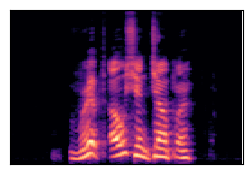

In [56]:
path = file_path + row['file_path']
y, sr = librosa.load(path)
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots()
fig.set_size_inches(3,2)
image = librosa.display.specshow(S_dB, sr=sr,ax=ax)
fig.canvas.draw()

In [36]:
valid = pd.DataFrame(columns=["affect", "rgb", "position"])
valid_csv = pd.read_csv(file_path+"/valid_data.csv")
for index, row in valid_csv.iterrows():
    affect = row['affect']
    position = row['phone_position']
    file = row["file_name"].replace("/media/data/shout-data/", "/dataset/")
    file = file.replace(".wav", "")
    file = file + row["chunk_name"]
    path = file_path + file
    y, sr = librosa.load(path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    fig, ax = plt.subplots()
    image = librosa.display.specshow(S_dB, sr=sr,ax=ax)
    fig.canvas.draw()
    
    # Convert the canvas to a raw RGB buffer
    buf = fig.canvas.tostring_rgb()
    ncols, nrows = fig.canvas.get_width_height()
    image = np.frombuffer(buf, dtype=np.uint8).reshape(nrows, ncols, 3)
    
    valid.loc[len(valid.index)] = [affect, image, position]
    
    plt.close()

valid.head()

KeyboardInterrupt: 

In [5]:
position_dict = {"Hold your phone next to your face with the mic facing your mouth as you would in a phone conversation 1/19": 0,
                "Hold your phone next to your face but with the mic/phone facing away from your face 2/19": 1,
                "Hold your phone next to your face with your hand covering the mic 3/19": 2,
                "Hold your phone next to your hip with the back of phone on your palm 4/19": 3,
                "Hold your phone next to your hip with your hand covering the mic 5/19": 4,
                "Place your phone in your pocket 6/19": 5,
                "Place your phone in a bag and hold it next to your hip 7/19": 6,
                "Place phone 1-2 meters away face up on any surface 8/19": 7,
                "Place phone 1-2 meters away face down on a hard surface 9/19": 8,
                "Place phone 1-2 meters away face down on a soft surface 10/19": 9,
                "Place phone 1-2 meters away in a bag 11/19": 10,
                "Place phone on the opposite side of the room face up on any surface 12/19": 11,
                "Place phone on the opposite side of the room face down on a hard surface 13/19": 12,
                "Place phone on the opposite side of the room face down on a soft surface 14/19": 13,
                "Place phone on the opposite side of the room in a bag 15/19": 14,
                "Place phone as far away as possible while on on the opposite side of a wall from you face up on any surface 16/19": 15,
                "Place phone as far away as possible while on on the opposite side of a wall from you face down on a hard surface 17/19": 16,
                "Place phone as far away as possible while on on the opposite side of a wall from you face down on a soft surface 18/19": 17,
                "Place phone as far away as possible while on on the opposite side of a wall from you in a bag 19/19": 18}
data['position'] = data['position'].map(position_dict)
data.head

<bound method NDFrame.head of        affect                                                rgb  position
0     sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...      14.0
1     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...       1.0
2     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...      12.0
3     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...      12.0
4     disgust  [[[255, 255, 255], [255, 255, 255], [255, 255,...       7.0
...       ...                                                ...       ...
2948  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...      16.0
2949  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...      16.0
2950  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...      16.0
2951     fear  [[[255, 255, 255], [255, 255, 255], [255, 255,...       8.0
2952     fear  [[[255, 255, 255], [255, 255, 255], [255, 255,...       8.0

[2953 rows x 3 columns]>

In [6]:
data = data.drop(data[data.position.isna()].index)
data['position'] = data['position'].astype('uint8')

In [8]:
def grayscale(row):
    return(row['rgb'].dot([[0.299],[0.587],[0.114]]).reshape(200,300).astype('uint8'))
    
data['gray'] = data.apply(grayscale, axis=1)
data.head

<bound method NDFrame.head of        affect                                                rgb  position  \
0     sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...        14   
1     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...         1   
2     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...        12   
3     neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...        12   
4     disgust  [[[255, 255, 255], [255, 255, 255], [255, 255,...         7   
...       ...                                                ...       ...   
2948  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...        16   
2949  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...        16   
2950  sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...        16   
2951     fear  [[[255, 255, 255], [255, 255, 255], [255, 255,...         8   
2952     fear  [[[255, 255, 255], [255, 255, 255], [255, 255,...         8   

                                 

In [7]:
valid = data.sample(n=100)
train = data.drop(valid.index)
print(valid.head)
print(train.head)

<bound method NDFrame.head of         affect                                                rgb  position
1160   neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...         5
652   surprise  [[[255, 255, 255], [255, 255, 255], [255, 255,...         3
2686   neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...         5
2248   sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...         2
1445   disgust  [[[255, 255, 255], [255, 255, 255], [255, 255,...         5
...        ...                                                ...       ...
2716       joy  [[[255, 255, 255], [255, 255, 255], [255, 255,...        13
1689       joy  [[[255, 255, 255], [255, 255, 255], [255, 255,...         6
843    neutral  [[[255, 255, 255], [255, 255, 255], [255, 255,...         4
1993   sadness  [[[255, 255, 255], [255, 255, 255], [255, 255,...         6
2367      fear  [[[255, 255, 255], [255, 255, 255], [255, 255,...        12

[100 rows x 3 columns]>
<bound method NDFrame.head of    

In [8]:
y_train = train['affect'].map(emotion_dict)
y_valid = valid['affect'].map(emotion_dict)
y_train = keras.utils.to_categorical(y_train, num_classes=7)
y_valid = keras.utils.to_categorical(y_valid, num_classes=7)
print(y_train.shape)
print(y_valid.shape)

(2847, 7)
(100, 7)


In [9]:
x_train = np.asarray(train['rgb'])
x_train = np.stack(x_train, axis=0)
x_valid = np.asarray(valid['rgb'])
x_valid = np.stack(x_valid, axis = 0)
print(x_train.shape)
print(x_valid.shape)

(2847, 200, 300, 3)
(100, 200, 300, 3)


Build the CNN model using the data above

In [73]:
with tf.device("CPU"):
    train_cnn = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(4*16).batch(16)
    validate_cnn = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(16)

cnn = keras.Sequential()

cnn.add(keras.layers.Input(shape=(200,300,3)))
cnn.add(keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(keras.layers.Dropout(0.10))

#cnn.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#cnn.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
#cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(7, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(train_cnn, epochs=15, validation_data=validate_cnn)

Epoch 1/15
178/178 [==============================] - 4s 20ms/step - loss: 35.9400 - accuracy: 0.1865 - val_loss: 23.0984 - val_accuracy: 0.1000
Epoch 2/15
178/178 [==============================] - 3s 19ms/step - loss: 5.4765 - accuracy: 0.5609 - val_loss: 9.8393 - val_accuracy: 0.2600
Epoch 3/15
178/178 [==============================] - 3s 18ms/step - loss: 2.1677 - accuracy: 0.7896 - val_loss: 14.5928 - val_accuracy: 0.1500
Epoch 4/15
178/178 [==============================] - 3s 19ms/step - loss: 1.3751 - accuracy: 0.8925 - val_loss: 23.6351 - val_accuracy: 0.1600
Epoch 5/15
178/178 [==============================] - 3s 19ms/step - loss: 1.0273 - accuracy: 0.9150 - val_loss: 17.1218 - val_accuracy: 0.1700
Epoch 6/15
178/178 [==============================] - 3s 18ms/step - loss: 0.9610 - accuracy: 0.9273 - val_loss: 49.8122 - val_accuracy: 0.0800
Epoch 7/15
178/178 [==============================] - 3s 18ms/step - loss: 1.0774 - accuracy: 0.9298 - val_loss: 41.7384 - val_accuracy:

In [17]:
x_train = np.asarray(train['gray'])
x_train = np.stack(x_train, axis=0)
x_train = x_train.reshape(-1,200,300,1)
x_valid = np.asarray(valid['gray'])
x_valid = np.stack(x_valid, axis = 0)
x_valid = x_valid.reshape(-1,200,300,1)
print(x_train.shape)
print(x_valid.shape)

(2847, 480, 640, 1)
(100, 480, 640, 1)


In [36]:
cnn2 = keras.Sequential()

cnn2.add(keras.layers.Input(shape=(200,300,1)))
cnn2.add(keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
cnn2.add(keras.layers.BatchNormalization())
cnn2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn2.add(keras.layers.Dropout(0.10))

cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(7, activation='softmax'))

cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn2.fit(x_train,y_train, batch_size=128, epochs=15, validation_data=(x_valid,y_valid))

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 354s 13s/step - accuracy: 0.1506 - loss: 779.6714 - val_accuracy: 0.1700 - val_loss: 393.8850
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 338s 13s/step - accuracy: 0.2452 - loss: 250.5077 - val_accuracy: 0.2000 - val_loss: 147.4224
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 296s 12s/step - accuracy: 0.7378 - loss: 16.6073 - val_accuracy: 0.1900 - val_loss: 123.4992
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 349s 14s/step - accuracy: 0.9584 - loss: 1.7869 - val_accuracy: 0.2100 - val_loss: 109.9813
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 379s 16s/step - accuracy: 0.9819 - loss: 0.4235 - val_accuracy: 0.2100 - val_loss: 94.4396
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 313s 13s/step - accuracy: 0.9905 - loss: 0.2387 - val_accuracy: 0.2000 - val_loss: 69.3933
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 383s 16s/step - accuracy: 0.9962 - loss: 0.1235 - val_accuracy: 0.1900 - val_loss: 61.2413
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 403s 17s/step - accuracy: 0.9986 - loss: 0.0938 - 

In [10]:
x_train_pos = np.asarray(train['position']).reshape(-1,1)
x_valid_pos = np.asarray(valid['position']).reshape(-1,1)

In [11]:
print(x_train.shape)
print(x_train_pos.shape)
print(y_train.shape)

(2847, 200, 300, 3)
(2847, 1)
(2847, 7)


In [16]:
with tf.device("CPU"):
    train_cnn = tf.data.Dataset.from_tensor_slices(({"input_rgb": x_train, "input_pos":x_train_pos}, y_train)).shuffle(4*16).batch(16)
    validate_cnn = tf.data.Dataset.from_tensor_slices(({"input_rgb":x_valid, "input_pos": x_valid_pos}, y_valid)).batch(16)

input_rgb = keras.layers.Input(shape=(200, 300, 3))
input_pos = keras.layers.Input(shape=(1,))

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_rgb)
norm1 = keras.layers.BatchNormalization()(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(norm1)
drop1 = keras.layers.Dropout(0.10)(pool1)
flat1 = keras.layers.Flatten()(drop1)

flat2 = keras.layers.Flatten()(input_pos)

merged = keras.layers.concatenate([flat1, flat2])

dense = keras.layers.Dense(64, activation='relu')(merged)
output = keras.layers.Dense(7, activation='softmax')(dense)

cnn3 = keras.Model(inputs=[input_rgb, input_pos], outputs=output)

cnn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn3.fit([x_train, x_train_pos], y_train, batch_size=16, epochs=15, validation_data=([x_valid, x_valid_pos], y_valid))

Epoch 1/15
178/178 [==============================] - 4s 18ms/step - loss: 12.9997 - accuracy: 0.1391 - val_loss: 1.9477 - val_accuracy: 0.1500
Epoch 2/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9445 - accuracy: 0.1503 - val_loss: 1.9474 - val_accuracy: 0.1000
Epoch 3/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9446 - accuracy: 0.1545 - val_loss: 1.9478 - val_accuracy: 0.1000
Epoch 4/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9430 - accuracy: 0.1553 - val_loss: 1.9477 - val_accuracy: 0.1000
Epoch 5/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9423 - accuracy: 0.1545 - val_loss: 1.9481 - val_accuracy: 0.1000
Epoch 6/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9416 - accuracy: 0.1553 - val_loss: 1.9479 - val_accuracy: 0.1000
Epoch 7/15
178/178 [==============================] - 3s 18ms/step - loss: 1.9456 - accuracy: 0.1545 - val_loss: 1.9479 - val_accuracy: 0.100